In [2]:
%load_ext autoreload
%autoreload 2

In [178]:
import os
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import warnings

#pio.renderers.default='notebook'

warnings.filterwarnings('ignore')

In [4]:
current_directory = os.getcwd()
home_dir = current_directory.split("notebooks")[0]
data_dir = os.path.join(home_dir, "data")

In [5]:
# change current working directory
os.chdir(home_dir)

In [6]:
os.getcwd()

'C:\\Users\\vnarv\\PycharmProjects\\wine_quality'

### 1) read data

In [7]:
# read data
df_raw = pd.read_csv(os.path.join(data_dir, "wine-quality-white-and-red.csv"))

In [8]:
# chekc shape and data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
df_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [204]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Check perfect duplicates

In [10]:
if df_raw.shape != df_raw.drop_duplicates().shape:
    print(f"There are perfect duplicates in df:")
    print(f"df.shape = {df_raw.shape}, df.drop_duplicates.shape = {df_raw.drop_duplicates().shape}")
    df_raw.duplicated(df_raw.columns, keep=False)
    df_raw = df_raw.sort_values(by=df_raw.columns.tolist())
    display(df_raw[df_raw.duplicated(df_raw.columns, keep=False)])
else:
    print("There are none perfect duplicates")

There are perfect duplicates in df:
df.shape = (6497, 13), df.drop_duplicates.shape = (5320, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5040,red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
5042,red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
5029,red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
5030,red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
6386,red,5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,white,9.4,0.28,0.30,1.6,0.045,36.0,139.0,0.99534,3.11,0.49,9.3,5
3094,white,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,6
3095,white,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,6
1372,white,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.5,6


In [11]:
df_dedup = df_raw.drop_duplicates()
df_dedup.shape

(5320, 13)

### Check NaN values

In [12]:
check_nan = df_dedup.isna().sum()

### Check unique values

In [13]:
# dropna = True by default
df_dedup.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [14]:
# correct data types
df_dedup["quality"] = df_dedup["quality"].astype("category")
df_dedup["type"] = df_dedup["type"].astype("category")

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\3778098442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup["quality"] = df_dedup["quality"].astype("category")
C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\3778098442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup["type"] = df_dedup["type"].astype("category")


### Check nb of unique values

In [15]:
for col in df_dedup.columns:
    print(f"==={col}:")
    unique_vals = df_dedup[col].value_counts()
    print(unique_vals[unique_vals < 10])

===type:
Series([], Name: type, dtype: int64)
===fixed acidity:
10.70    9
4.80     9
10.80    8
11.10    8
12.50    7
12.00    7
4.70     6
4.90     6
11.20    5
11.40    5
11.30    5
10.90    5
11.80    4
12.40    4
12.60    4
11.70    3
13.30    3
11.00    3
12.20    3
12.30    3
12.70    3
12.80    3
4.40     3
4.20     2
15.60    2
4.60     2
12.90    2
13.20    2
13.00    2
13.40    1
3.90     1
7.15     1
6.45     1
6.15     1
12.10    1
4.50     1
3.80     1
13.50    1
15.90    1
15.50    1
15.00    1
14.30    1
14.00    1
13.80    1
13.70    1
14.20    1
Name: fixed acidity, dtype: int64
===volatile acidity:
0.715    9
0.780    9
0.255    9
0.110    9
0.785    8
        ..
0.825    1
0.950    1
0.405    1
1.115    1
0.930    1
Name: volatile acidity, Length: 126, dtype: int64
===citric acid:
0.71    8
0.61    7
1.00    6
0.73    6
0.67    6
0.69    6
0.72    6
0.70    5
0.79    3
0.78    3
0.76    3
0.81    2
0.82    2
0.75    1
0.91    1
0.99    1
0.86    1
1.66    1
0.80    

## Split categorical and numeric variables

In [44]:
# split categorical and numeric variables
target = "type"
df_y = df_dedup[[target]]
df_x = df_dedup.drop(target, axis=1)
df_numeric = df_x.select_dtypes(include=np.number)
df_categ = df_x.select_dtypes(include="category")

print(f"Numeric variables : {df_numeric.columns.tolist()}\n\n")
print(f"Categorical variables : {df_categ.columns.tolist()}\n\n")
print(f"Target variable : {target}\n\n")

Numeric variables : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Categorical variables : ['quality']


Target variable : type




In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def subplot_barplot(df, ncols, title):
    """
    Create subplots for barplot figures based on DataFrame columns.

    Parameters:
    - df: DataFrame containing the data for barplots.
    - ncols: Number of columns for subplots.
    - title: Title for the entire set of subplots.

    Returns:
    - None
    """
    # Calculate the number of rows for subplots based on the number of columns and ncols
    nrows = len(df.columns) // ncols + (len(df.columns) % ncols > 0)
    
    # Create a figure
    plt.figure(figsize=(5, 5))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(title, fontsize=9, y=0.95)

    for n, variable in enumerate(df.columns):
        # Add a new subplot iteratively
        ax = plt.subplot(nrows, ncols, n + 1)
        
        # Compute percentage of each value in the column
        temp = df[variable].value_counts(normalize=True).reset_index()
        temp.columns = [variable, "pct"]
        
        # Compute the volume (count) of each value in the column
        temp2 = df[variable].value_counts().reset_index()
        temp2.columns = [variable, "volume"]
        
        # Join percentage and volume data
        data = pd.concat([temp, temp2["volume"]], axis=1)
        
        # Sort the data by the variable in descending order
        data = data.sort_values(by=variable, ascending=False).reset_index()
        
        # Create a barplot using Seaborn
        ax = sns.barplot(x="pct", y=variable, data=data, palette="Paired", order=data[variable])
        
        # Extract volume data for labeling
        vol = [list(data['volume'])]

        try:
            # Add volume labels next to the bars
            for container, number in zip(ax.containers, vol):
                ax.bar_label(container, labels=number)
        except:
            pass

        ax.grid(b=True, which='major', axis='x')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.set_title(variable, loc='center', fontsize=9)
        ax.set_ylabel(variable, fontsize=9)
        ax.set_xlabel("%", fontsize=9)


C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\3802394291.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='x')


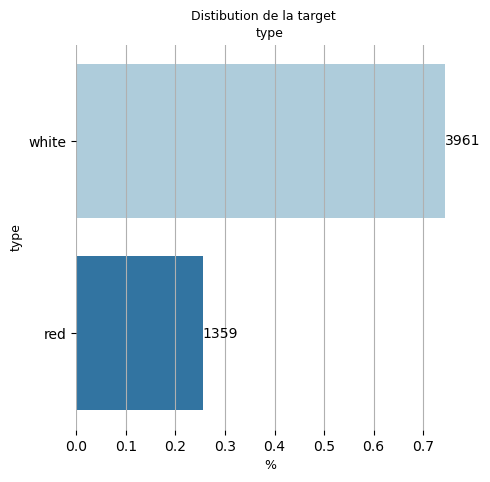

In [46]:
subplot_barplot(df_y, 1, "Distibution de la target")

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\3802394291.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='x')


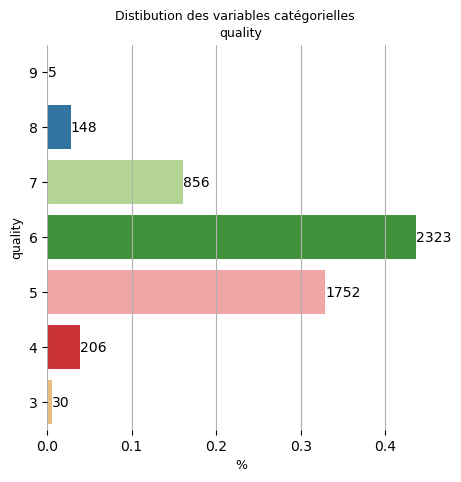

In [42]:
subplot_barplot(df_categ, 1, "Distibution des variables catégorielles")

### Target vs categorical variables

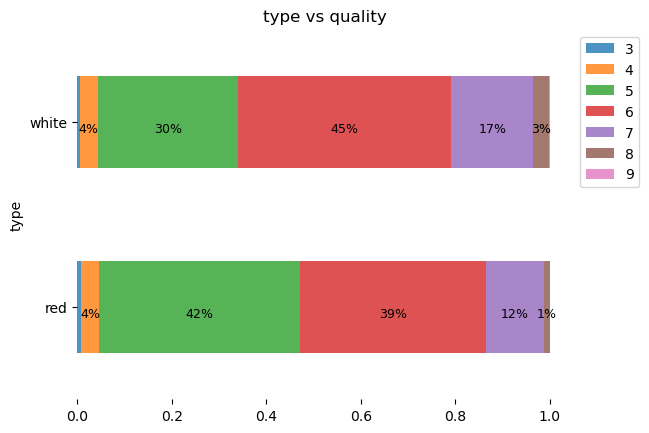

In [89]:
for col in df_categ.columns:
    ax = (pd.crosstab(df_x_categ_y[target], df_x_categ_y[col], normalize='index')
        .plot.barh(stacked=True, alpha=0.8, title=f'{target} vs {col}',
                  )
     )
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    # Add percentages on top of each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if width > 0.01:  # To avoid adding labels for small bars
            ax.annotate(f'{width*100:.0f}%', (x + width/2, y + height/2), ha='center', va='top', size=9)


- Quality 9 is not existant for red wine
- Nearly 81% of red wine has quality 5 and 6 vs 75% for white wine
- 65% of white wine have a quality score of 6 or higher, 52% of red wine have the top scores
- Overall, white wine has a better perceived quality than red wine

In [90]:
df_numeric.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4943,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1
4993,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9
5719,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0
6168,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
6012,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def kdeplot_custom(df, target, ncols, title, fig_type):
    """
    Create custom subplots for KDE plots or box plots.

    Parameters:
    - df: DataFrame containing the data.
    - target: The target variable for the plot (if applicable).
    - ncols: Number of columns for subplots.
    - title: Title for the entire set of subplots.
    - fig_type: Type of plot to create, either 'kde' for KDE plots or 'boxplot' for box plots.

    Returns:
    - None
    """
    # Determine the columns to use for plotting based on the presence of a target variable
    if target:
        cols = df.drop(target, axis=1).columns
    else:
        cols = df.columns
    
    # Calculate the number of rows for subplots based on the number of columns and ncols
    nrows = len(cols) // ncols + (len(cols) % ncols > 0)

    # Create a figure
    plt.figure(figsize=(20, 30))
    plt.subplots_adjust(hspace=0.9)
    plt.suptitle(title, fontsize=15, y=0.95)

    for n, variable in enumerate(cols):
        # Add a new subplot iteratively
        ax = plt.subplot(nrows, ncols, n + 1)
        
        # Create KDE plots or box plots based on fig_type and the presence of a target variable
        if (fig_type == "kde") & (target is None):
            sns.kdeplot(ax=ax, x=variable, y=target, data=df, fill=True)
        elif fig_type == "boxplot":
            sns.boxplot(ax=ax, x=variable, y=target, data=df)
        else:
            raise ValueError("Enter a valid value for fig_type and target")

        # Customize subplot appearance
        ax.grid(b=True, which='major', axis='y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(f"Variable = {variable}",
                     loc='center',
                     fontsize=15)


### Explore numeric variables

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local

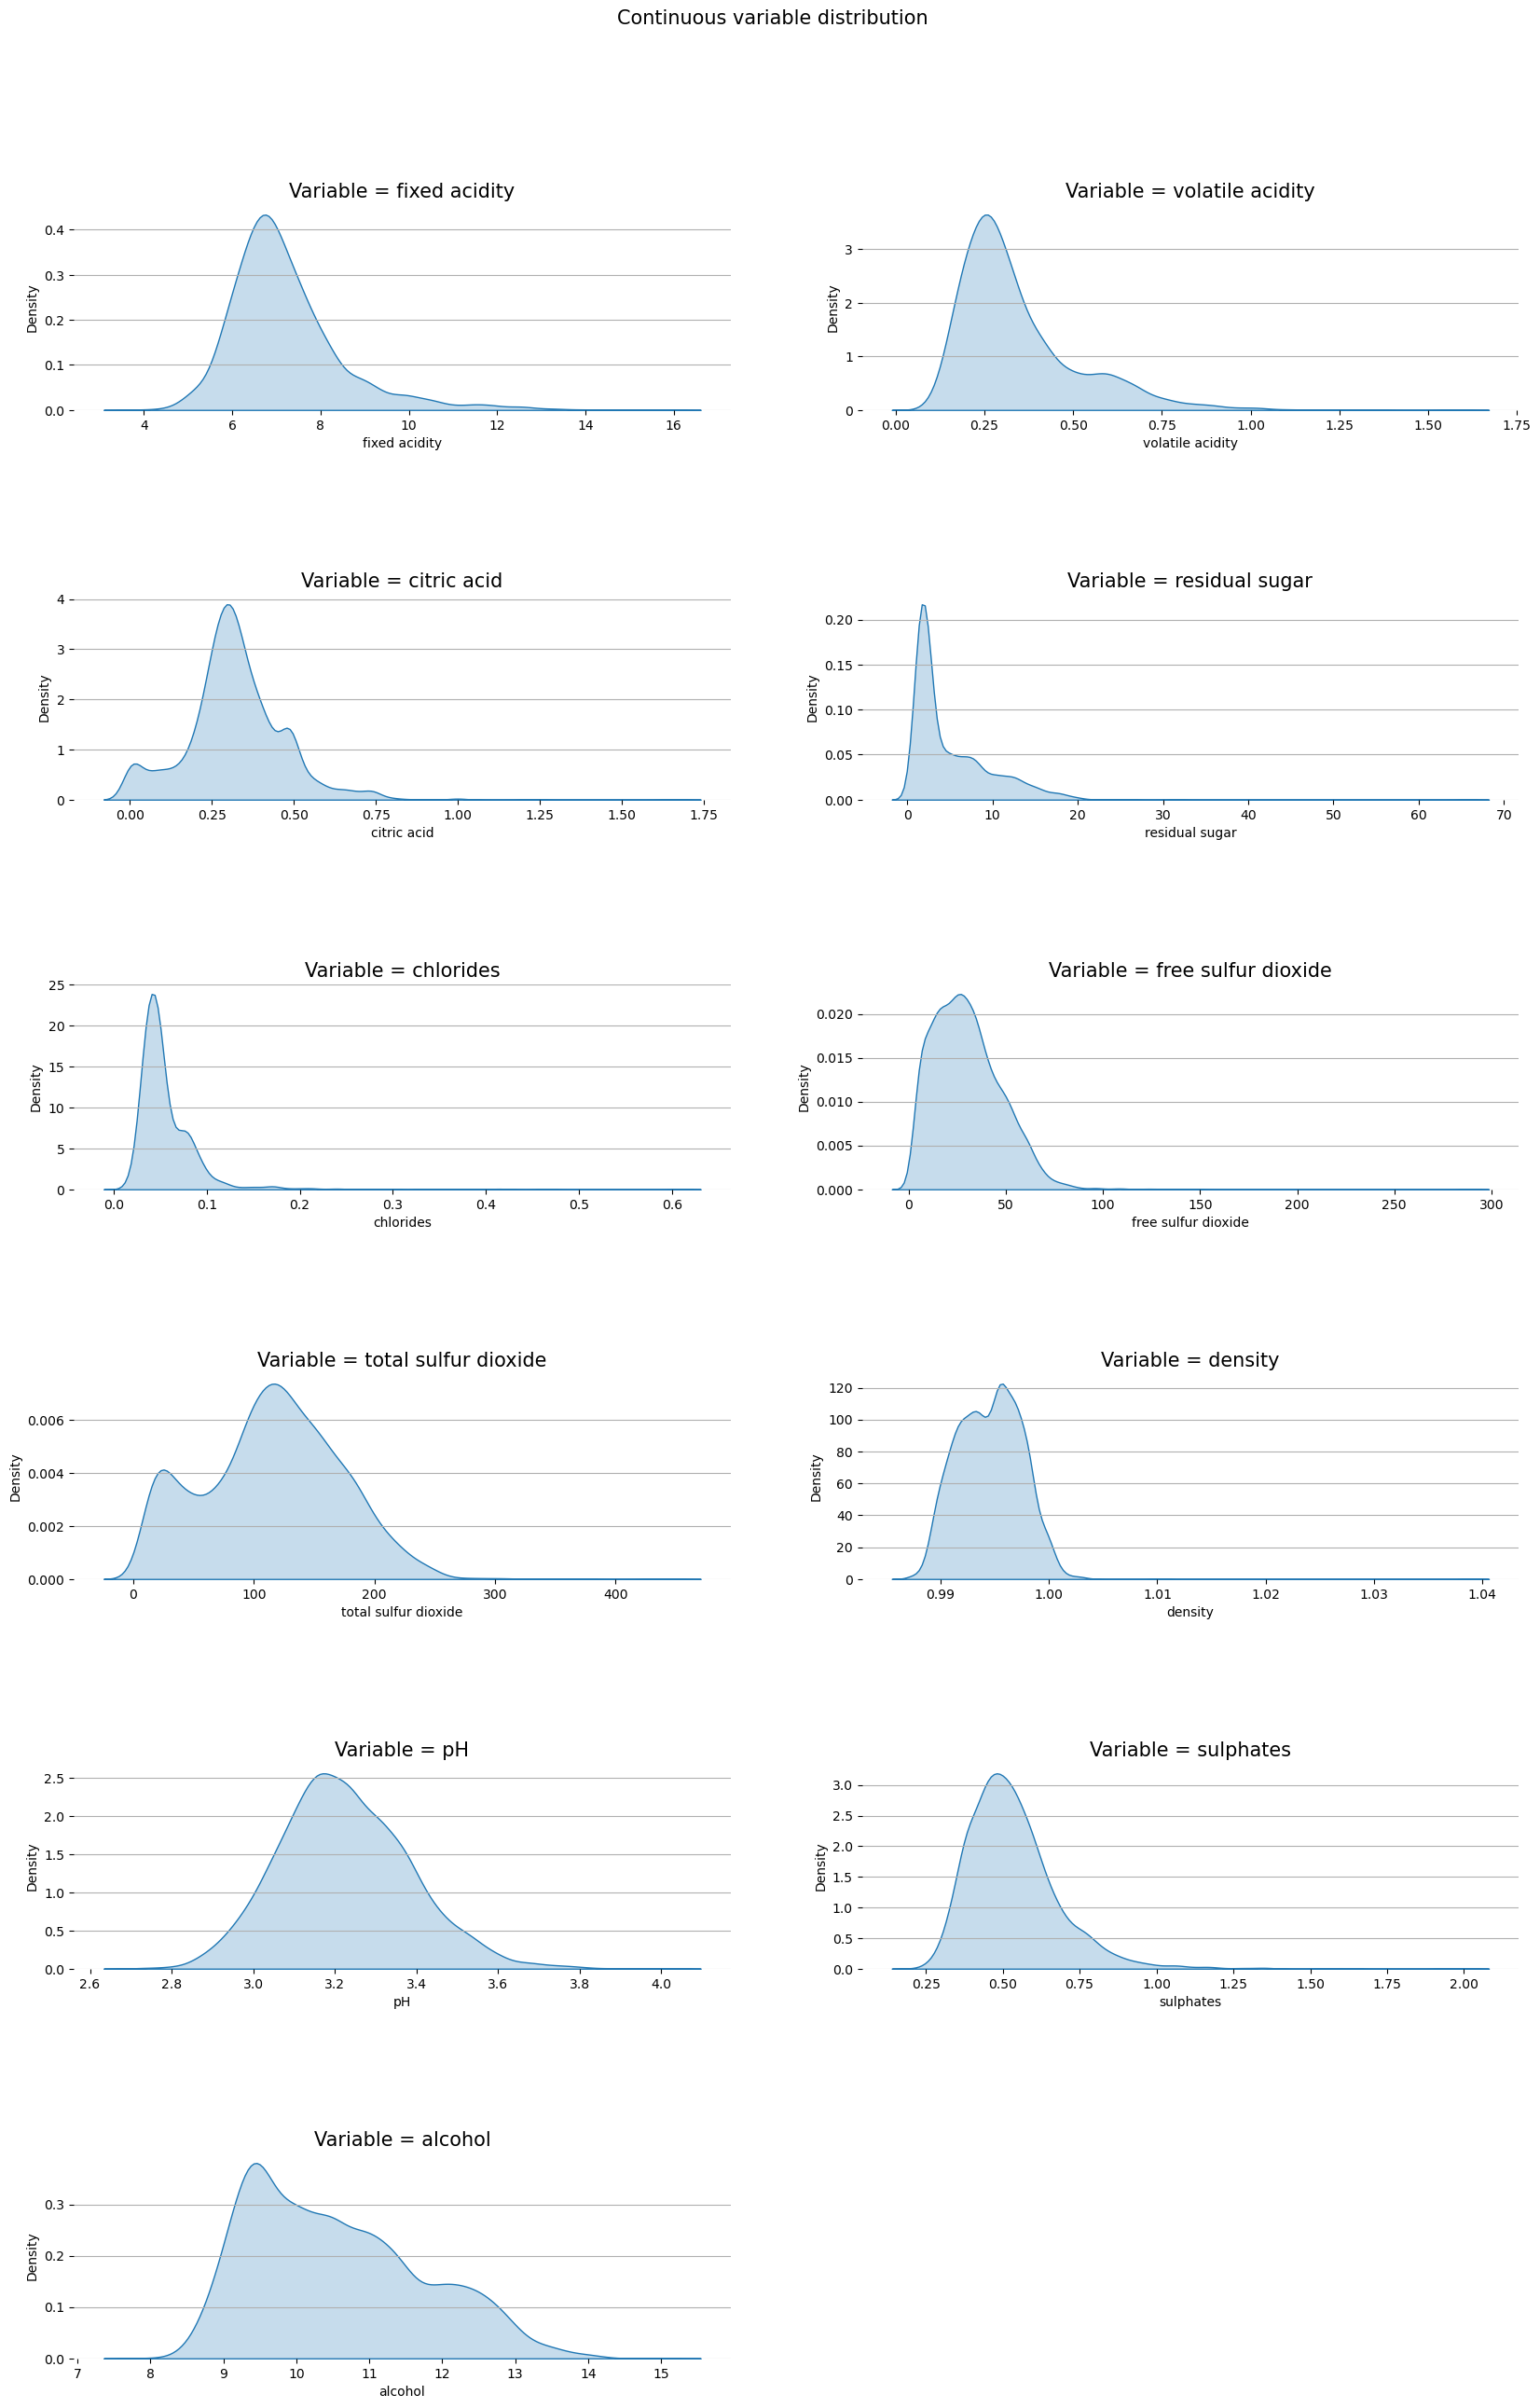

In [176]:
kdeplot_custom(df_numeric, None, 2,  "Continuous variable distribution", "kde")

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\2264828773.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local

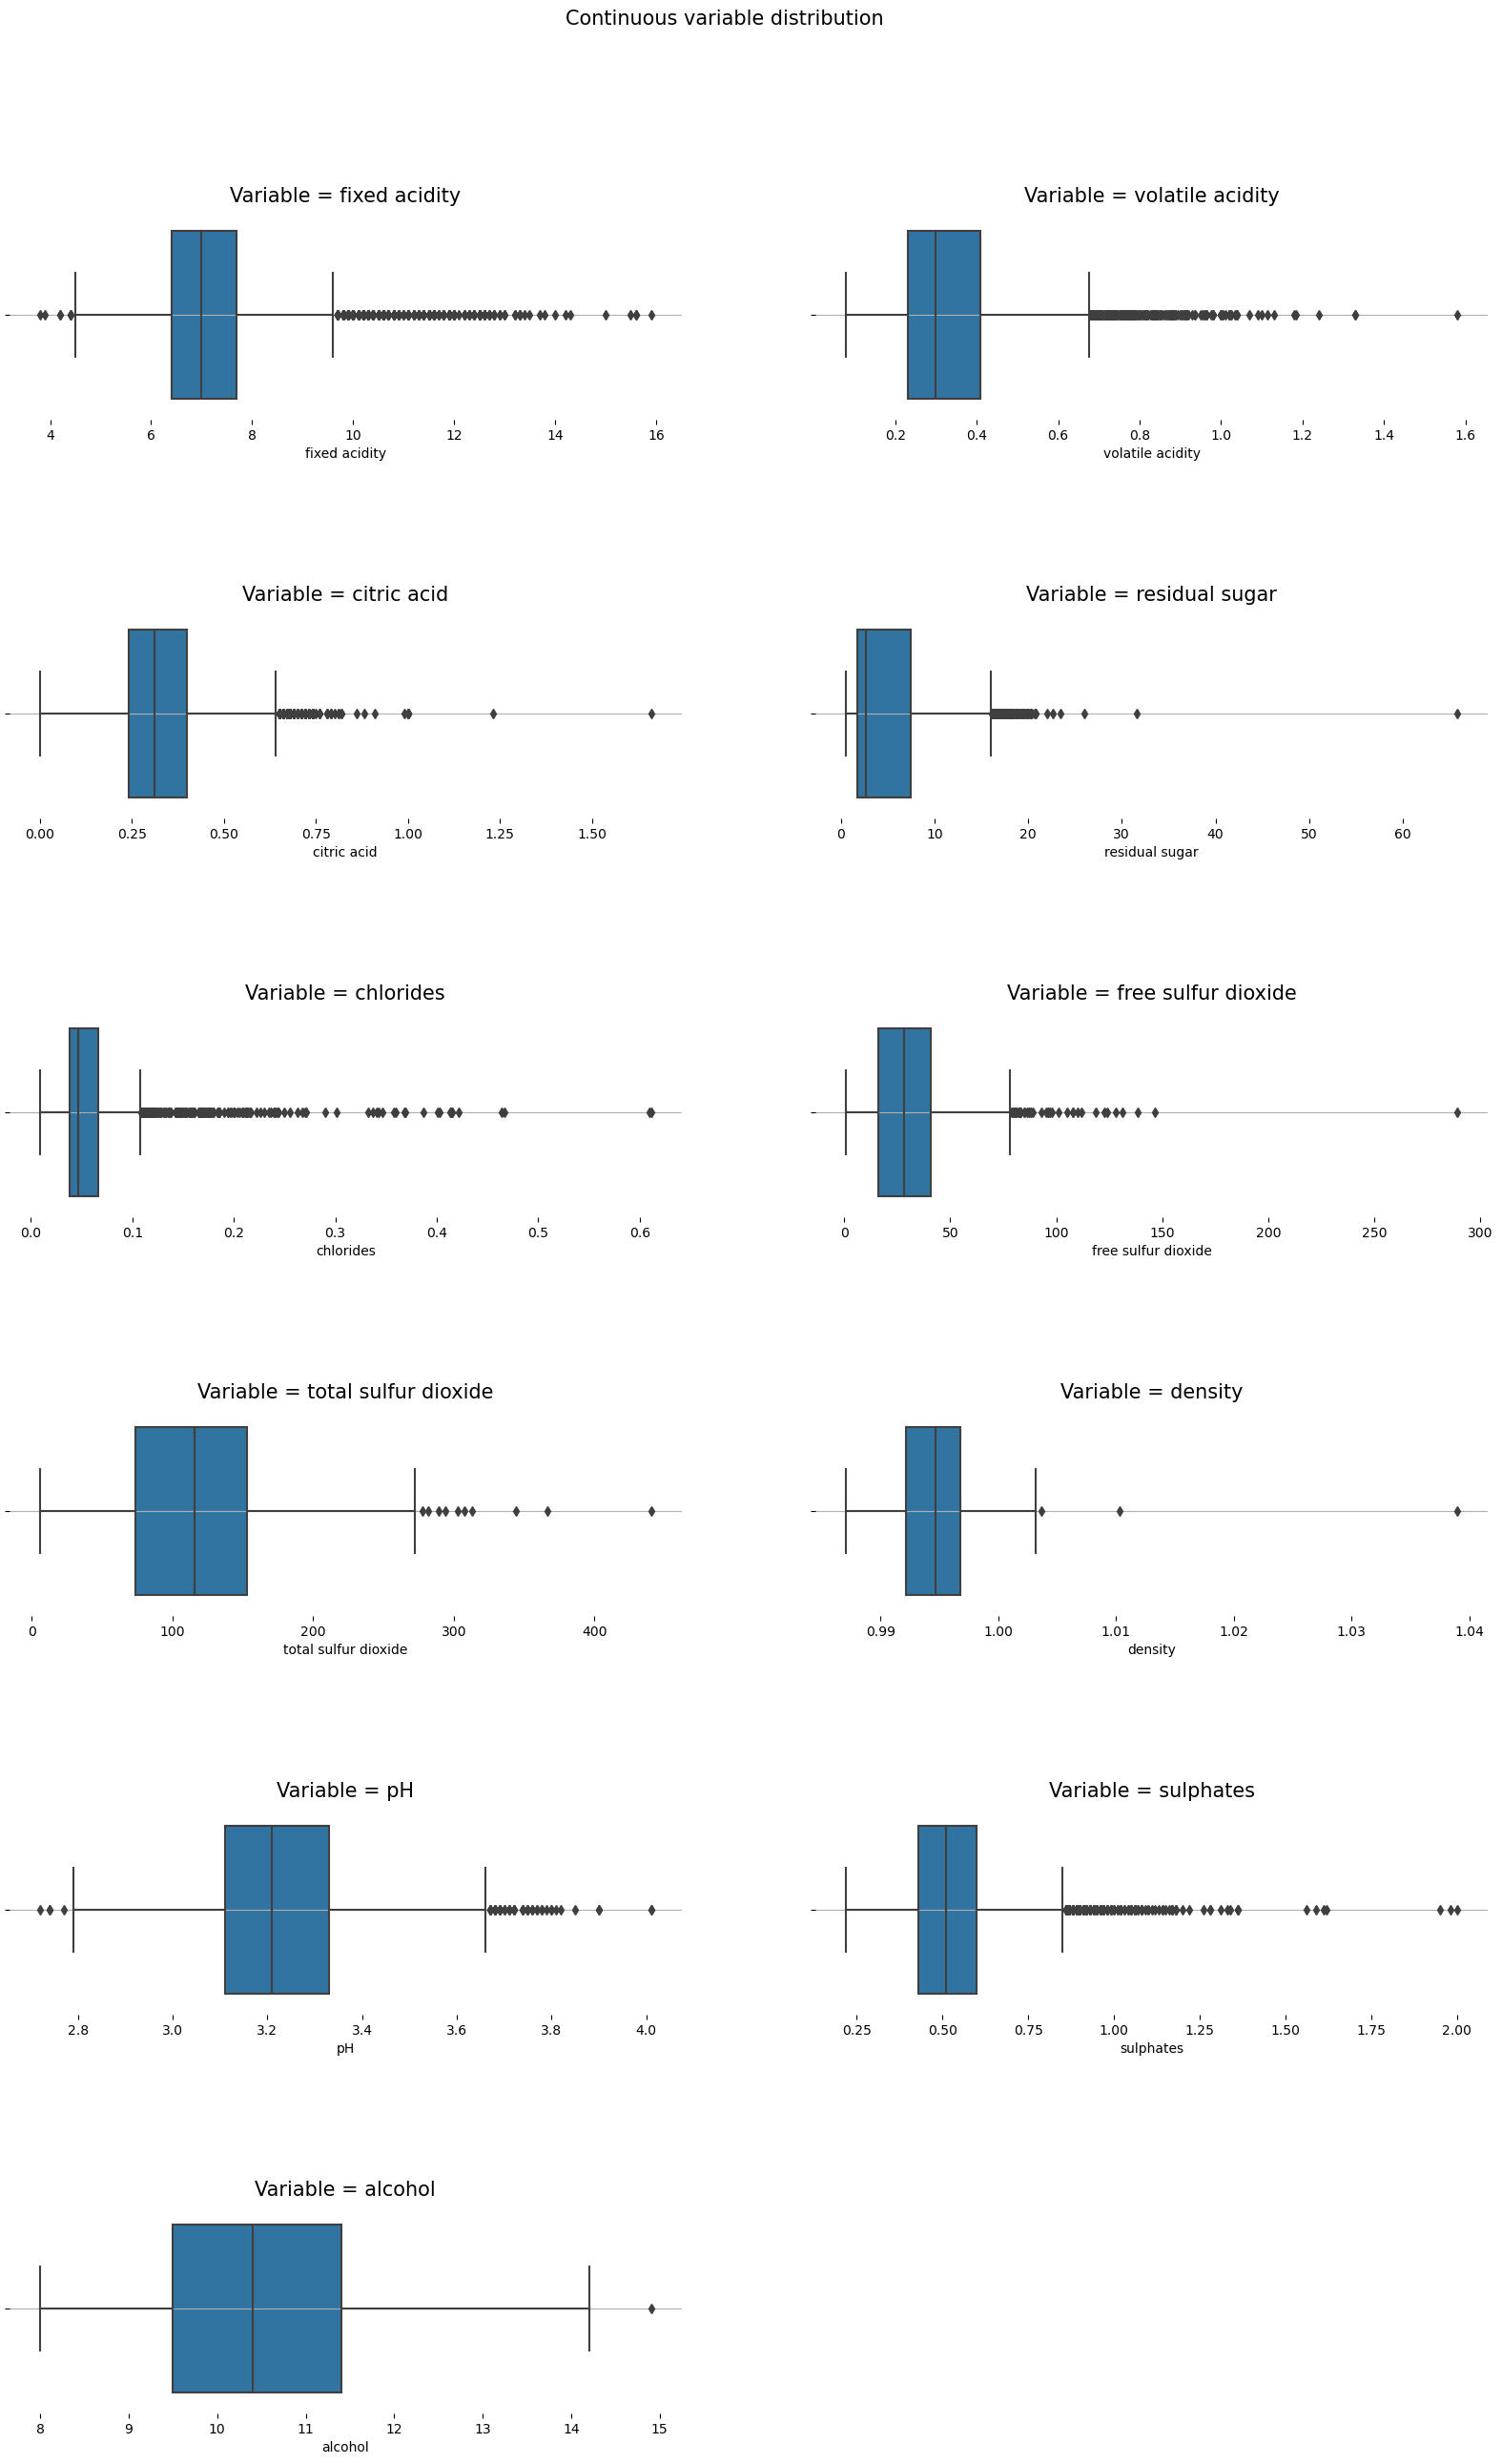

In [177]:
kdeplot_custom(df_numeric, None, 2,  "Continuous variable distribution", "boxplot")

### Bivariate statistics for numeric features

In [203]:
%matplotlib inline
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

def plot_corr_matrix(df, title):
    """
    Create a correlation matrix heatmap plot using Plotly.

    Parameters:
    - df: DataFrame containing the data for the correlation matrix.
    - title: Title for the correlation matrix plot.

    Returns:
    - None
    """
    # Calculate the correlation matrix
    corrMatrix = df.corr()

    # Set the default Plotly template to "plotly_white"
    pio.templates.default = "plotly_white"

    # Create a heatmap using Plotly
    heat = go.Heatmap(
        z=corrMatrix,
        x=corrMatrix.columns,
        y=corrMatrix.columns,
        colorscale=px.colors.diverging.delta,
        zmin=-1,
        zmax=1
    )

    # Define the layout for the heatmap plot
    layout = go.Layout(
        title_text=title,
        title_x=0.5,
        width=600,
        height=600,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        yaxis_autorange='reversed'
    )

    # Create a Figure and display the heatmap plot
    fig = go.Figure(data=[heat], layout=layout)
    fig.show()
    return corrMatrix
    
plot_corr_matrix(df_numeric, 'Correlation Matrix for all numerical variables')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232


- According to the pearson correlatios, the most correlated numerical features are density and alcohol (-60%)

###  Target vs numeric variables

In [173]:
df_y_x_numeric = pd.concat([df_numeric, df_y], axis=1)

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\687780598.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\687780598.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\687780598.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_5872\687780598.py:46: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\vnarv\AppData\Local\Tem

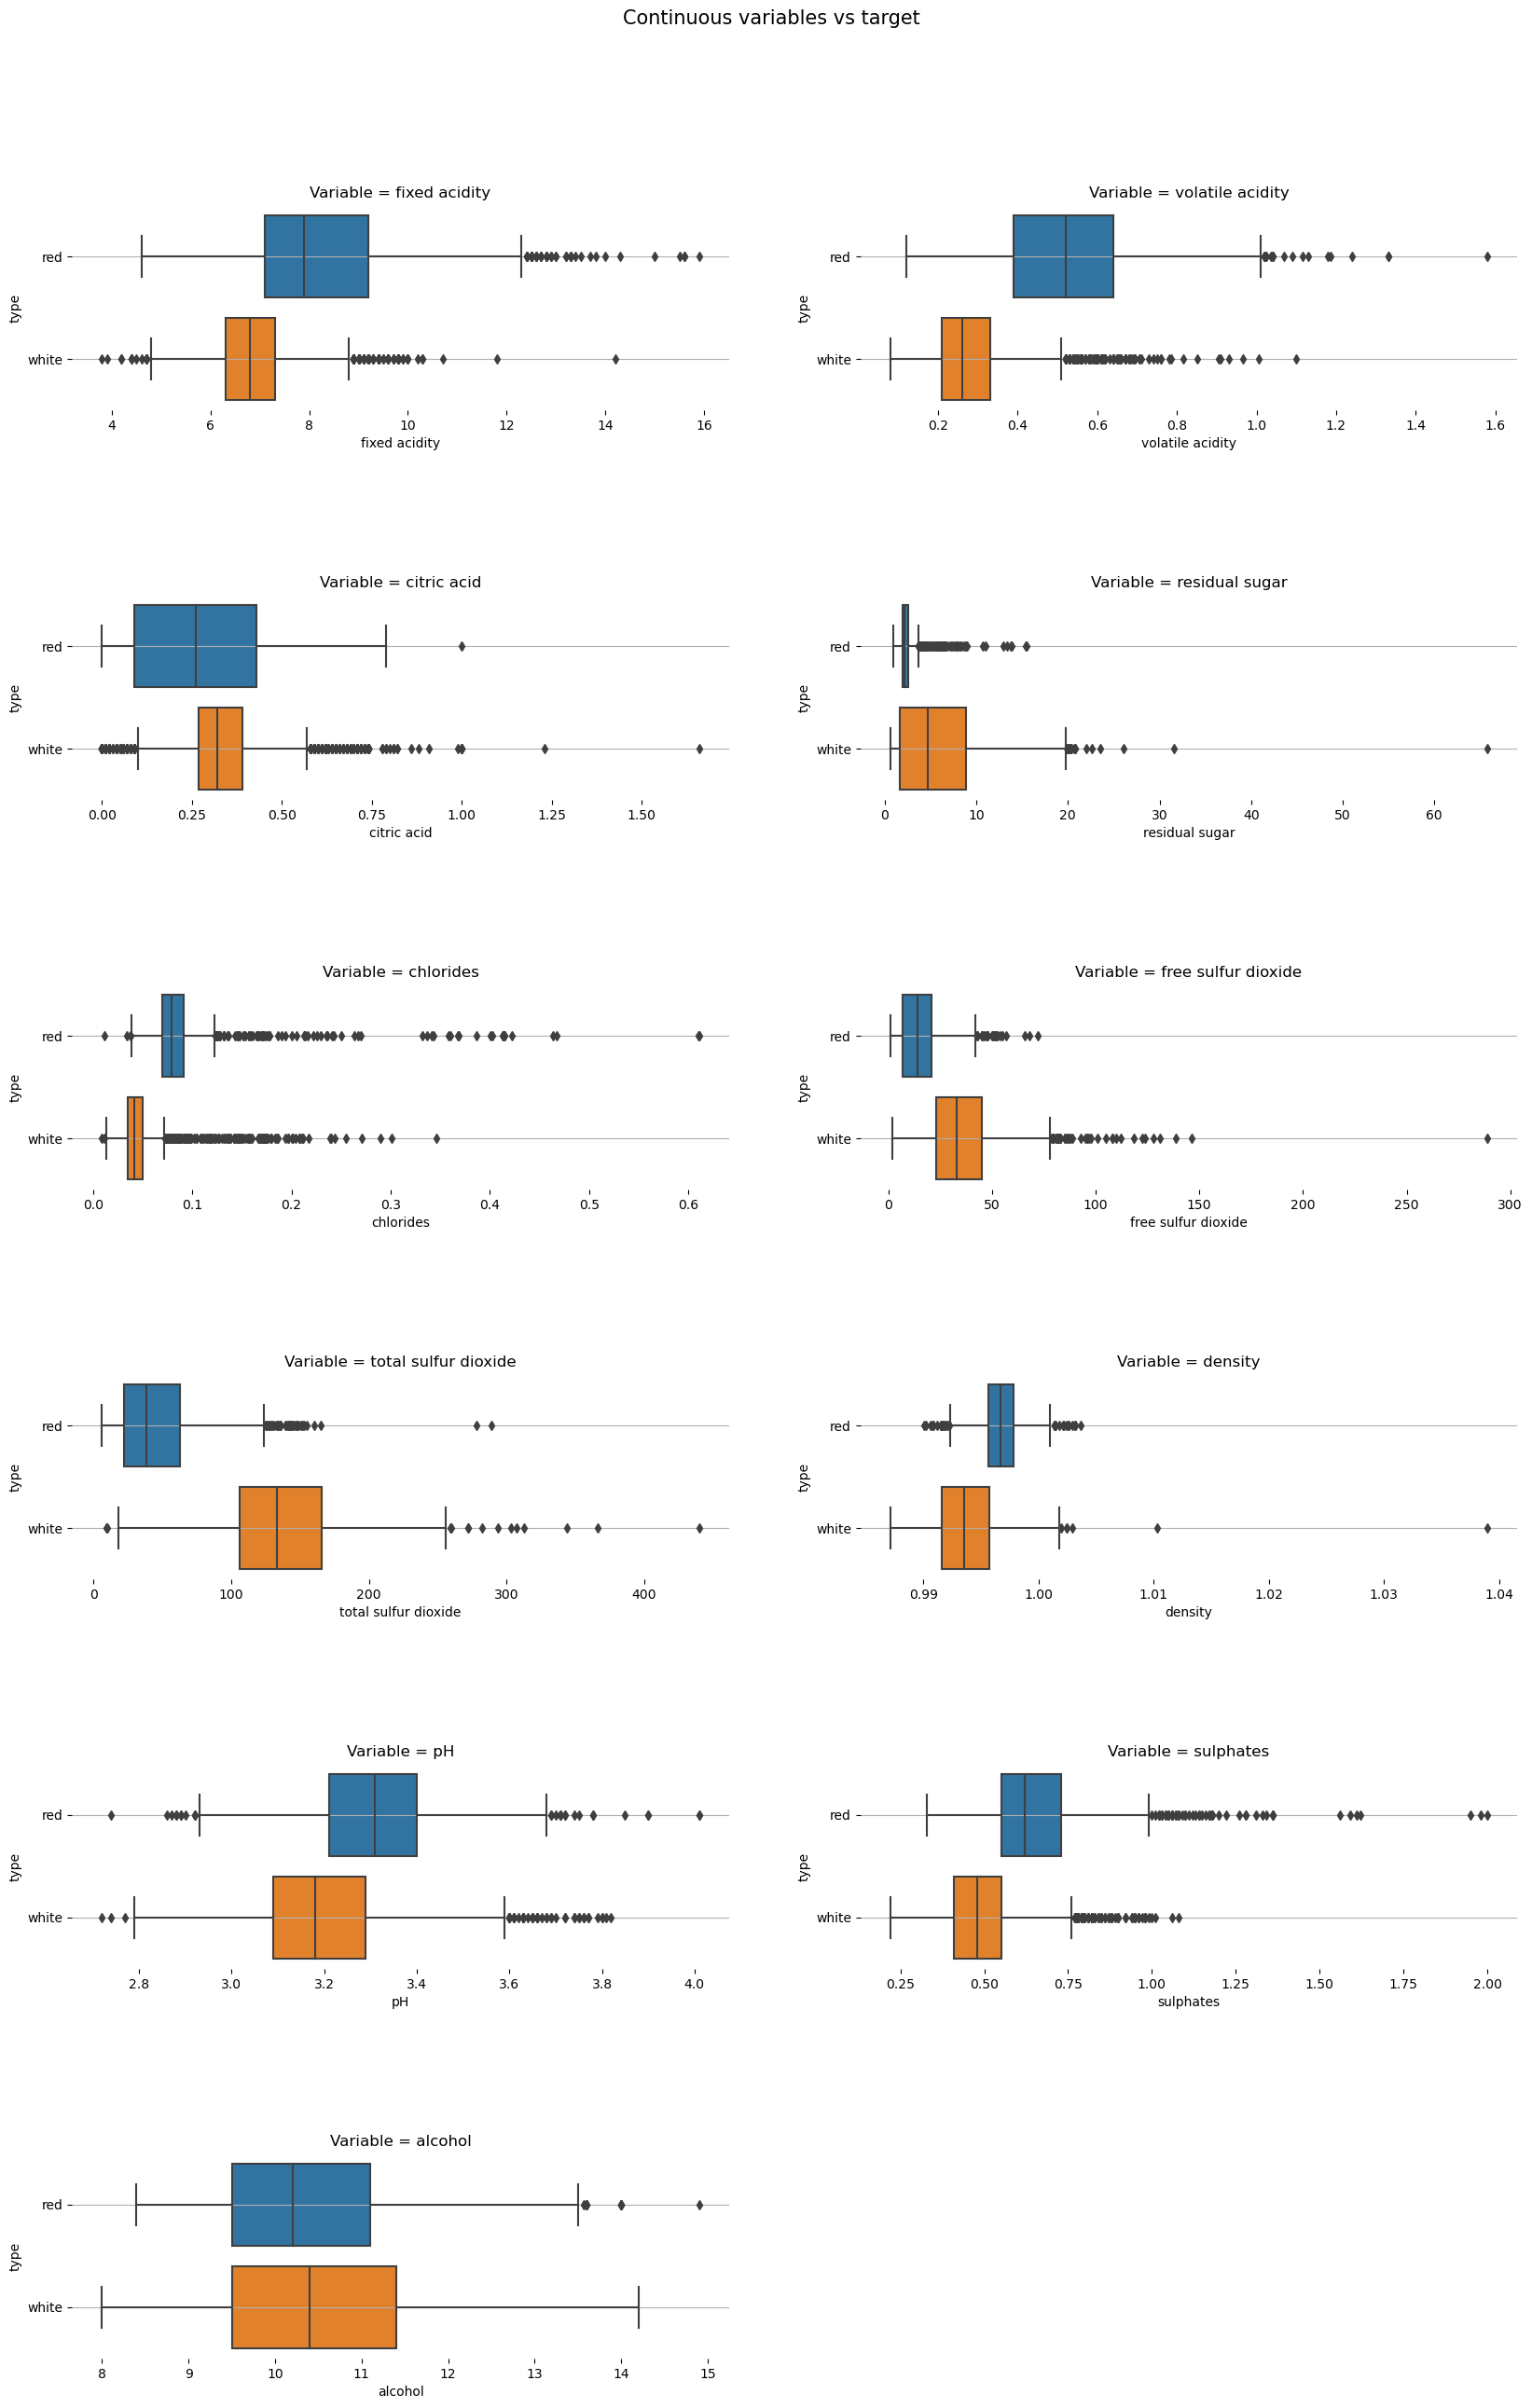

In [174]:
kdeplot_custom(df_y_x_numeric, target, 2,  "Continuous variables vs target", "boxplot")

- Outliers are typically shown as individual data points beyond the "whiskers" of the box plot.
- The variables "chloride" and "sulphates" seem to have several points outside the whiskers.

### Check outliers
- Outlier points can also be pinpoint as values that are at least 3 standard deviations far from the mean
- or outside the IQR boundaries (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) 

In [246]:
def find_outliers_by_std(df, std_dev_thr=3):
    std_dev_threshold = 3
    mean = np.mean(df)
    std_dev = np.std(df)
    r = f"Outliers Check: More than {std_dev_thr} std far from mean"
    for var in df:
        outliers = df[(df[var] < std_dev.loc[var]) | (df[var] > (mean.loc[var] + std_dev_threshold))]
        if len(outliers) > 0:
            r += f"""
            {var} .... {len(outliers)} observations ({(len(outliers)/len(df)):.1%})
            """
    print(r)
    
def find_outliers_by_iqr(df):
    r = f"Outliers Check: IQR method"
    for var in df:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        q1 = np.percentile(df[var], 25)
        q3 = np.percentile(df[var], 75)
        # Calculate the interquartile range (IQR)
        iqr = q3 - q1
        # Set the threshold for outliers based on the IQR method
        iqr_threshold_lower = q1 - 1.5 * iqr
        iqr_threshold_upper = q3 + 1.5 * iqr
        # Find outliers using the threshold values
        outliers_iqr = df[(df[var] < iqr_threshold_lower) | (df[var] > (iqr_threshold_upper))]
        # Print the outliers
        if len(outliers_iqr) > 0:
            r += f"""
            {var} .... {len(outliers_iqr)} observations ({(len(outliers_iqr)/len(df)):.1%})
            """
    print(r)

In [247]:
find_outliers_by_std(df_numeric)
find_outliers_by_iqr(df_numeric)

Outliers Check: More than 3 std far from mean
            fixed acidity .... 193 observations (3.6%)
            
            volatile acidity .... 330 observations (6.2%)
            
            citric acid .... 581 observations (10.9%)
            
            residual sugar .... 4348 observations (81.7%)
            
            chlorides .... 1158 observations (21.8%)
            
            free sulfur dioxide .... 3494 observations (65.7%)
            
            total sulfur dioxide .... 3622 observations (68.1%)
            
            alcohol .... 37 observations (0.7%)
            
Outliers Check: IQR method
            fixed acidity .... 304 observations (5.7%)
            
            volatile acidity .... 279 observations (5.2%)
            
            citric acid .... 143 observations (2.7%)
            
            residual sugar .... 141 observations (2.7%)
            
            chlorides .... 237 observations (4.5%)
            
            free sulfur dioxide 

- Both methods show that there are outlier values. These values could be dropped, or replace by the mean or median values.
- On a real world case, we could think of finding out with an expert if these values are really extreme and unusual in wines.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def compute_khi2_test(df, target, alpha):
    # Create a contingency table from the dataset
    x = df.drop(target, axis=1)
    dependent_list = []
    for var in x:
        contingency_table = pd.crosstab(df[target], df[var])
        # Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Check if the result is statistically significant at alpha
        if p < alpha:
            dependent_list.append(var)
    return dependent_list   

### Statistical tests of dependence

In [199]:
# numeric variables vs target
compute_khi2_test(df_y_x_numeric, target, 0.05)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [200]:
# all variables are dependent of the target
compute_khi2_test(df_y_x_numeric, target, 0.001)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [201]:
# categorical variables vs target
df_y_x_categ = pd.concat([df_categ, df_y], axis=1)
compute_khi2_test(df_y_x_categ, target, 0.001)

['quality']

- Based on the khi2 test, all variables are dependent to the target